In [1]:
from data import *
import plotly.express as px

In [2]:
# retrieve data from the datasets
df = construct_dataframe()

In [3]:
# Display all data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
display(HTML(df.to_html(index=False)))

Country,Rank,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Finland,1,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,7.19,0.03,92.78,3.0,10.45,9.86,28.00,295.00,676.00
Denmark,2,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,3.0,11.13,10.36,18.00,246.00,735.00
Switzerland,3,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,10.42,0.61,88.97,3.0,9.71,8.49,15.00,0.34,645.00
Iceland,4,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,0.07,0.00,99.93,3.0,13.64,6.72,86.00,0.15,765.00
Norway,5,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,0.00,97.13,3.0,11.46,9.40,21.00,415.00,564.00
Netherlands,6,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117,16491461,41526,397.1,1.09,2.91,5.04,28600.0,99.0,460.8,26.71,0.97,72.32,3.0,10.90,8.68,21.00,244.00,736.00
Sweden,7,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299,9016596,449964,20.0,0.72,1.67,2.77,26800.0,99.0,715.0,6.54,0.01,93.45,3.0,10.27,10.31,11.00,282.00,707.00
New Zealand,8,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108,4076140,268680,15.2,5.63,4.05,5.85,21600.0,99.0,441.7,5.60,6.99,87.41,3.0,13.76,7.53,43.00,273.00,684.00
Austria,9,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,18.00,304.00,678.00
Luxembourg,10,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.01,0.13,0.86


In [4]:
# 1. Do the happiness ranking and the ladder score match?
display(HTML('<h2>1. Do the happiness ranking and the ladder score match?</h2>'))
display(HTML('<h4>Answer: Yes</h4>'))
display(HTML('<h3>Happiness Ranking</h3>'))
df_sorted = df.sort_values('Rank')
display_side_by_side(df_sorted[['Country', 'Rank']].head(5), df_sorted[['Country', 'Rank']].tail(5))

display(HTML('<h3>Ladder Score Ranking</h3>'))
df_sorted = df.sort_values('Ladder score', ascending=False)
display_side_by_side(df_sorted[['Country', 'Ladder score']].head(5), df_sorted[['Country', 'Ladder score']].tail(5))

Country,Rank
Finland,1
Denmark,2
Switzerland,3
Iceland,4
Norway,5
Country,Rank
Botswana,147
Tanzania,148
Rwanda,150
Zimbabwe,151


Country,Ladder score
Finland,7.8087
Denmark,7.6456
Switzerland,7.5599
Iceland,7.5045
Norway,7.4880
Country,Ladder score
Botswana,3.4789
Tanzania,3.4762
Rwanda,3.3123
Zimbabwe,3.2992


In [11]:
# 2. Examining the relationship between the following variables: ladder score, social support, healthy life expectancy, freedom to make choices, GDP ($ per capita)
display(HTML('<h2>2. Examining the relationship between the following variables: ladder score, social support, healthy life expectancy, freedom to make choices, GDP ($ per capita), and generosity</h2>'))
display(HTML('<h4>Hypothesis:</h4>'))
display(HTML('<p>1. All the variables have a coefficient correlation of at least 0.6 with the ladder score.</p>'))
display(HTML('<p>2. The higher the GDP per capita, the higher the generosity score.</p>'))
display(HTML('<p>3. A positive correlation between freedom to make choices and social support.</p>'))
display(HTML('<h4>Answers: </h4>'))
display(HTML('<p>1. True for all but generosity which only has the correlation coefficient of 0.127! </p>'))
display(HTML('<p>2. False </p>'))
display(HTML('<p>3. True (0.46) </p>'))
filtered_df = df[['Ladder score', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'GDP ($ per capita)', 'Generosity']]
corr_matrix = filtered_df.corr()
fig = px.imshow(corr_matrix)
fig.show()

Correlation coefficient: 0.5250341204794339


<AxesSubplot:xlabel='Literacy (%)', ylabel='GDP ($ per capita)'>

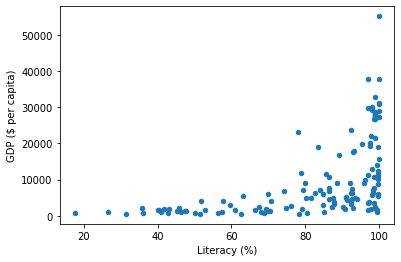

In [6]:
# 3. How does the percentage of literacy affect GDP per capita? 
display(HTML('<h2>3. How does the percentage of literacy affect GDP per capita?</h2>'))
display(HTML('<h4>Hypothesis: The higher the literacy %, the higher GDP per capita</h4>'))
display(HTML('<h4>Answer: True</h4>'))
filtered_data = df[['GDP ($ per capita)', 'Literacy (%)']]
coeff = filtered_data['GDP ($ per capita)'].corr(filtered_data['Literacy (%)'])
print('Correlation coefficient: ' + str(coeff))                                                          
# plt.scatter(filtered_data['GDP ($ per capita)'], filtered_data['Literacy (%)'])
filtered_data.plot(kind='scatter', x='Literacy (%)', y='GDP ($ per capita)')


In [7]:
# 4. Does having a higher literacy number matter in an agricultural-based country?
display(HTML('<h2>4. Does having a higher literacy number matter in an agricultural-based country?'))
display(HTML('<h4>Hypothesis: No correlation </h4>'))
display(HTML('<h4>Answer: True</h4>'))
filtered_df = df[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']]
corr_matrix = filtered_df.corr()
fig = px.imshow(corr_matrix)
fig.show()

Correlation coefficient: 0.8912948512208893


<AxesSubplot:xlabel='Phones (per 1000)', ylabel='GDP ($ per capita)'>

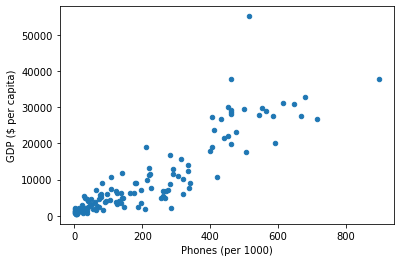

In [8]:
# 5. Does having more access to technology leads to higher GDP?
display(HTML('<h2>5. Does having more access to technology leads to higher GDP?</h2>'))
display(HTML('<h4>Hypothesis: Yes</h4>'))
display(HTML('<h4>Answer: Yes, the correlation coefficient is actually a lot higher than I expected.</h4>'))
filtered_data = df[['GDP ($ per capita)', 'Phones (per 1000)']]
coeff = filtered_data['GDP ($ per capita)'].corr(filtered_data['Phones (per 1000)'])
print('Correlation coefficient: ' + str(coeff))                                      
filtered_data.plot(kind='scatter', x='Phones (per 1000)', y='GDP ($ per capita)')

Correlation coefficient: -0.30399481027472225


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Generosity'>

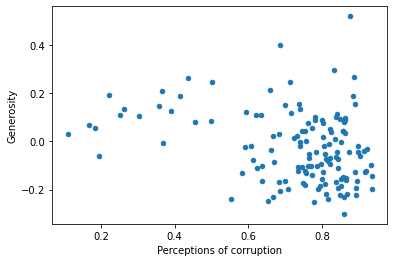

In [9]:
# 6. Are people less likely donate if they perceive the government and businesses as corrupted?
display(HTML('<h2>6. Are people less likely donate if they perceive the government and businesses as corrupted?</h2>'))
display(HTML('<h4>Hypothesis: Yes, because a lot of charitable work and fundraising are done by the government and bigger companies.</h4>'))
display(HTML('<h4>Answer: False</h4>'))
filtered_data = df[['Generosity', 'Perceptions of corruption']]
coeff = filtered_data['Generosity'].corr(filtered_data['Perceptions of corruption'])
print('Correlation coefficient: ' + str(coeff))                                      
filtered_data.plot(kind='scatter', x='Perceptions of corruption', y='Generosity')

Correlation coefficient: -0.6386114790912131


<AxesSubplot:xlabel='Birthrate', ylabel='GDP ($ per capita)'>

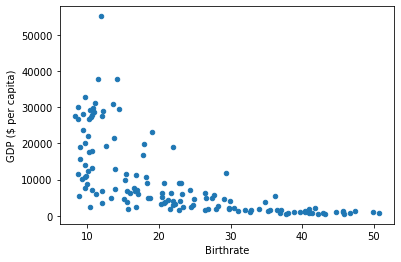

In [10]:
# 7. Do countries with higher GDP have lower birthrate?
display(HTML('<h2>7. Do countries with higher GDP have lower birthrate?</h2>'))
display(HTML('<h4>Hypothesis: No correlation</h4>'))
display(HTML('<h4>Answer: True</h4>'))
filtered_data = df[['GDP ($ per capita)', 'Birthrate']]
coeff = filtered_data['GDP ($ per capita)'].corr(filtered_data['Birthrate'])
print('Correlation coefficient: ' + str(coeff))                                      
filtered_data.plot(kind='scatter', x='Birthrate', y='GDP ($ per capita)')